In [1]:
import matplotlib.pyplot as plt
import numpy as np

import scipy.ndimage as ndimage

from PIL import Image

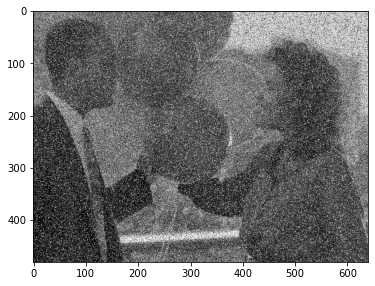

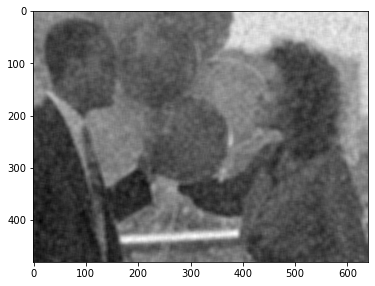

In [2]:
A = Image.open("images/noisy.png").convert("L")
A = np.asarray(A)

kernel = np.full((9, 9), 1)
kernel = kernel / np.sum(kernel)

plt.figure(figsize=(6, 6))
plt.imshow(A, cmap="gray")
Image.fromarray(A).save("outputs/lab 3 part 1 original.png")

B = ndimage.convolve(A, kernel)
plt.figure(figsize=(6, 6))
plt.imshow(B, cmap="gray")
Image.fromarray(B).save("outputs/lab 3 part 1 filtrado.png")


## Filtro gaussiano

In [3]:
def gaussian_kernel(m=5, sigma=1):
    ax = np.linspace(-(m - 1) / 2., (m - 1) / 2., m)
    gauss = np.exp(-0.5 * np.square(ax) / np.square(sigma))
    kernel = np.outer(gauss, gauss)
    return kernel / np.sum(kernel)

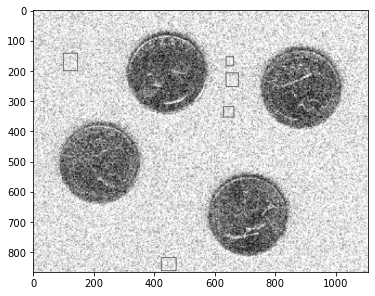

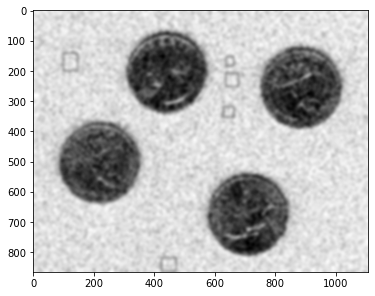

In [4]:

A = Image.open("images/salt_pepper.png").convert("L")
A = np.asarray(A)

kernel = gaussian_kernel(21, 5)

plt.figure(figsize=(6, 6))
plt.imshow(A, cmap="gray")
Image.fromarray(A).save("outputs/lab 3 part 2 original.png")

B = ndimage.convolve(A, kernel)
plt.figure(figsize=(6, 6))
plt.imshow(B, cmap="gray")
Image.fromarray(B).save("outputs/lab 3 part 2 filtrado.png")


## Laplaciano

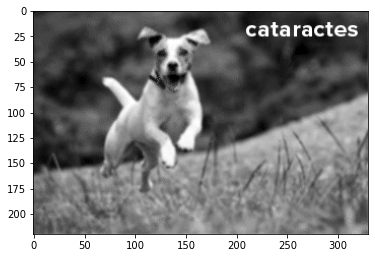

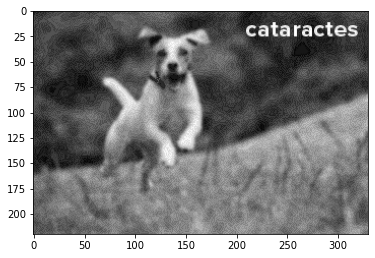

In [5]:
A = Image.open("images/jack_russell.gif").convert("L")
A = np.asarray(A)


plt.figure(figsize=(6, 6))
plt.imshow(A, cmap="gray")
Image.fromarray(A).save("outputs/lab 3 part 3 original.png")

laplacian = ndimage.laplace(A)
laplacian = laplacian / np.amax(laplacian)

C = A - 25 *  laplacian
C = np.clip(C, 0, 255)
C = C.astype(np.uint8)

plt.figure(figsize=(6, 6))
plt.imshow(C, cmap="gray")
Image.fromarray(C).save("outputs/lab 3 part 3 filtrado.png")

